In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import IFrame

In [2]:
# считаем данные в DataFrame
data = pd.read_csv('Points.csv', index_col=0)
import random
w_array = []
w = np.array([random.random() for i in range(3)])
w_array.append(w)
X = pd.DataFrame({'X_1': [data.x1.min()-5, data.x1.max()+5]})

In [3]:
counter = 1 
flag = 1
while flag == 1:
    flag = 0 
    print('Прогонка №', counter)
    for i in range(1,len(data.index)+1):
        point_coord = np.array([data.loc[i]['x1'],data.loc[i]['x2'],1])
        f_net = np.sign(np.dot(w,point_coord))
        #print('f(net)=',f_net)
        #print('d_',i,'=',data.loc[i]['answer'])
        if f_net == data.loc[i]['answer']:
            print('Значения совпадают продолжаем')
        else:
            print('Значения не совпадают меняем веса')
            flag = 1
            w = w + 2 * (data.loc[i]['answer'] - f_net) * point_coord
            w_array.append(w)
            print('w=',w)
    counter += 1

Прогонка № 1
Значения совпадают продолжаем
Значения не совпадают меняем веса
w= [-37.28966029 -25.49363359  -3.08483829]
Значения не совпадают меняем веса
w= [-27.28966029 -17.09363359   0.91516171]
Значения совпадают продолжаем
Значения не совпадают меняем веса
w= [-25.28966029  -8.29363359   4.91516171]
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения не совпадают меняем веса
w= [-14.08966029  -5.09363359   8.91516171]
Значения не совпадают меняем веса
w= [-9.28966029  6.90636641 12.91516171]
Значения совпадают продолжаем
Прогонка № 2
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения совпадают продолжаем
Значения не совпадают меняем веса
w= [ 1.91033971 10.10636641 16.91516171]
Значения совпадают продолжаем
Значения не совпадают меняем веса
w= [-29.28966029 -14.29363359  12.91516171]
Прогонка № 3
Значения не совпадают меняем ве

MovieWriter ffmpeg unavailable; using Pillow instead.


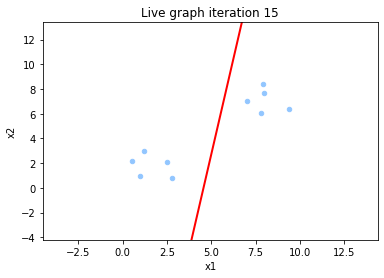

In [4]:
plt.style.use('seaborn-pastel')
fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1) 

def animate(i):
    ax1.clear()
    Y = -w_array[i][0]/w_array[i][1]*X-w_array[i][2]/w_array[i][1]
    ax1.set_xlim([data.x1.min()-5, data.x1.max()+5])
    ax1.set_ylim([data.x2.min()-5, data.x2.max()+5])
    data.plot(kind='scatter', x='x1', y='x2', ax = ax1)
    ax1.plot(X, Y, c='red', linewidth=2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Live graph iteration '+str(i))

ani = animation.FuncAnimation(fig, animate, frames=len(w_array), interval=500)

# ani.save('classification.gif', writer='imagemagick')
ani.save('classification.gif')

In [5]:
from IPython.display import IFrame
IFrame('classification.gif', width=800, height=400)